In [128]:
import numpy as np
import matplotlib.pyplot as plt
import numpy
import matplotlib
import pandas as pd
import scipy
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import datasets

%matplotlib inline

# without sklearn

In [172]:
df = pd.read_csv("34_25.csv", sep=",", names=range(10))
F = df.to_numpy()
df.head()

,0,1,2,3,4,5,6,7,8,9
0,13.255663,-3.970881,2.796957,-6.344109,24.017276,-18.697087,21.128203,-18.501314,-0.839574,-16.191357
1,-26.357436,7.110444,16.870685,4.426741,15.145726,17.248351,-12.547473,17.486641,-9.131461,-20.452525
2,-3.576196,-18.649942,24.643430,-14.978293,-9.286028,8.377791,4.414909,-12.870903,15.586781,-0.174785
3,-23.203200,8.301919,16.095409,7.643220,16.914143,16.649280,-8.603661,16.012082,-11.373881,-21.142902
4,9.998677,-0.640020,2.602077,-4.334787,22.336607,-23.446092,20.818255,-17.437508,-0.637234,-16.413384


In [167]:
#math
n = len(F)
O = np.dot(F.T, F)/n
l, v = np.linalg.eig(O) #l - собственные числа, v[:,i] - собственные вектора
#print(np.dot(O, v[:,0]))
#print(np.dot(l[0], v[:,0]))
l2 = l.copy()
l2.sort()
l2 = l2[::-1]

In [168]:
V = []
for L in l2:
    index = np.where(l==L)[0][0]
    V.append(v[index])
V = np.array(V)
print(F)
print(V.T)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ 0.         -0.00577193 -0.10069602 ... -0.13088512 -0.13088512
  -0.13088512]
 [ 0.          0.01736194  0.2242008  ...  0.09012861  0.09012861
   0.09012861]
 [ 0.          0.0098574   0.04480717 ... -0.18321057 -0.18321057
  -0.18321057]
 ...
 [ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [169]:
#Z=FV
Z = np.dot(F, V.T)
print(Z)

[[  0.          -4.20597508 -20.24875183 ...  -8.74038405  -8.74038405
   -8.74038405]
 [ 10.         -10.9602738   -3.57292602 ... -12.2780427  -12.2780427
  -12.2780427 ]
 [ 16.         -11.11669294 -10.80237491 ... -11.2719134  -11.2719134
  -11.2719134 ]
 ...
 [  6.          -9.19421692  -3.98246603 ...  -8.85971858  -8.85971858
   -8.85971858]
 [ 12.          -8.02977516 -18.77221661 ... -19.65794747 -19.65794747
  -19.65794747]
 [ 12.          -6.63998961 -10.07216265 ... -15.241594   -15.241594
  -15.241594  ]]


In [142]:
print(v) #собственные вектора
print(l) #собственные числа

[[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [-0.00577193  0.01736194  0.0098574  ...  0.          0.
   0.        ]
 [-0.10069602  0.2242008   0.04480717 ...  0.          0.
   0.        ]
 ...
 [-0.13088512  0.09012861 -0.18321057 ...  0.          0.
   0.        ]
 [-0.03923437  0.03684109 -0.02149533 ...  0.          0.
   0.        ]
 [-0.00676005  0.01151507  0.00640454 ...  0.          0.
   0.        ]]
[2.67655672e+03 1.78901135e+02 1.63477656e+02 1.41440698e+02
 1.00795421e+02 6.94285642e+01 5.71177942e+01 5.07784914e+01
 4.34903153e+01 4.01239250e+01 2.90948593e+01 2.79631908e+01
 2.39822851e+01 2.15991904e+01 1.92081332e+01 1.69941633e+01
 1.62432236e+01 1.52329995e+01 1.22335697e+01 1.16895737e+01
 1.08042409e+01 9.60142865e+00 9.23335230e+00 8.68898815e+00
 8.36803083e+00 7.18666966e+00 6.91734005e+00 6.22677050e+00
 5.88979324e+00 5.15371724e+00 4.49039060e+00 4.25836394e+00
 4.04768288e+00 3.94123258e+00 3.71841725e+00 3.53060076e+00
 3.0852

# with sklearn

In [185]:
pca = PCA(n_components=2, svd_solver='full')

In [186]:
X_full = pca.fit(F).transform(F)
print(X_full)

[[-34.78385542 -22.59549992]
 [ 12.65462903  30.34120785]
 [-10.86457445 -20.62457524]
 [ 10.6242521   29.65375074]
 [-33.9262402  -20.67442681]
 [-17.06771031  28.64975227]
 [ 51.37507454 -16.70522789]
 [ -8.10479142 -22.38014373]
 [ 45.83407404 -14.01387413]
 [  8.85269441  29.26619983]
 [ 50.135796   -14.34876135]
 [ 11.52591182  28.8455728 ]
 [-14.32973052  28.92882176]
 [ -7.32200673 -23.67253794]
 [ -7.84504591 -22.52841942]
 [-17.77144854  30.89893748]
 [ 48.23321962 -13.13982203]
 [ 10.70064365  29.08144968]
 [ -7.81842006 -23.38527825]
 [ -7.7070086  -23.48130365]
 [-16.20751365  27.16600187]
 [ 50.2471334  -16.04837794]
 [-15.38843078  27.25656976]
 [ 10.74650057  30.53148709]
 [-20.42678116  28.87035416]
 [-35.59741424 -23.00310173]
 [-30.61624805 -22.12761637]
 [ 10.84170631  31.74510153]
 [ 49.19197027 -15.2601062 ]
 [-31.60230636 -20.11001716]
 [-31.18194997 -22.3936765 ]
 [ 48.02110961 -15.18121144]
 [-34.64109256 -23.25463127]
 [ 48.41842764 -15.39752015]
 [-16.85323621

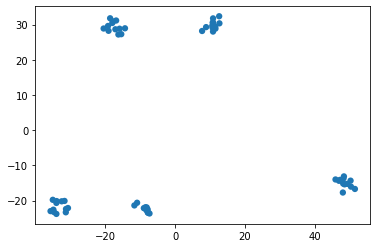

In [189]:
#если n_components=2
plt.scatter(X_full[:101, 0], X_full[:101, 1], edgecolor='none', s=40,cmap='winter')

In [182]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.406, 0.71 , 0.907, 0.994, 0.996, 0.997, 0.998, 0.999, 0.999,
       1.   ])

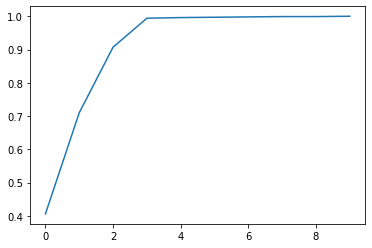

In [183]:
plt.plot(np.arange(10), explained_variance, ls = '-')

# 2.1

In [193]:
df = pd.read_csv("X_reduced_408.csv", sep=";", names=range(10))
Z = df.to_numpy()
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
1,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
2,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
3,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928
4,0.813516,46.249795,48.287749,-35.611005,-200.935466,-53.587974,-7.265691,-2.084236,-3.816588,-14.379928


In [194]:
df = pd.read_csv("X_loadings_408.csv", sep=";", names=range(10))
F = df.to_numpy()
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.787744e-20,2.119321e-18,3.091457e-18,-2.821326e-18,-1.830720e-17,-7.298324e-18,-3.430076e-18,-1.167668e-18,-2.241555e-18,-1.119798e-17
1,3.339343e-17,5.551115e-17,0.000000e+00,-2.775558e-17,-0.000000e+00,5.551115e-17,-1.387779e-17,-3.122502e-17,1.040834e-17,-2.775558e-17
2,1.734723e-17,0.000000e+00,5.551115e-17,-1.387779e-17,-0.000000e+00,1.110223e-16,4.163336e-17,4.857226e-17,-2.775558e-17,-2.775558e-17
3,-4.857226e-17,0.000000e+00,-4.163336e-17,-1.387779e-17,2.775558e-17,-1.110223e-16,-2.775558e-17,-2.081668e-17,-2.775558e-17,-1.665335e-16
4,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,1.387779e-17,5.551115e-17,2.775558e-17,-3.469447e-17,6.938894e-18,1.110223e-16


In [199]:
#Z=FX => X=F_T*Z =>
X = np.dot(Z, F.T)
print(X)

[[ 4.61439629e-15  1.13353010e-15 -2.65931395e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.61439629e-15  1.13353010e-15 -2.65931395e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.61439629e-15  1.13353010e-15 -2.65931395e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.61439629e-15  1.13353010e-15 -2.65931395e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.61439629e-15  1.13353010e-15 -2.65931395e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.61439629e-15  1.13353010e-15 -2.65931395e-15 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


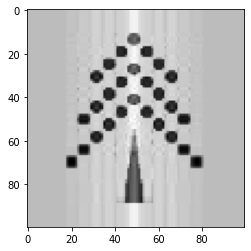

In [200]:
plt.imshow(X, cmap='Greys_r')